# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


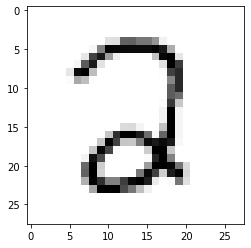

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2581
Training Accuracy: 0.5068, Testing Accuracy: 0.5101



Epoch 10, Loss 0.1229
Training Accuracy: 0.9044, Testing Accuracy: 0.9138



Epoch 20, Loss 0.0658
Training Accuracy: 0.9347, Testing Accuracy: 0.9466



Epoch 30, Loss 0.0487
Training Accuracy: 0.9474, Testing Accuracy: 0.9572



Epoch 40, Loss 0.041
Training Accuracy: 0.9544, Testing Accuracy: 0.9617



Epoch 50, Loss 0.0367
Training Accuracy: 0.9574, Testing Accuracy: 0.9632



Epoch 60, Loss 0.0339
Training Accuracy: 0.9600, Testing Accuracy: 0.9642



Epoch 70, Loss 0.0319
Training Accuracy: 0.9615, Testing Accuracy: 0.9652



Epoch 80, Loss 0.0303
Training Accuracy: 0.9635, Testing Accuracy: 0.9677



Epoch 90, Loss 0.029
Training Accuracy: 0.9651, Testing Accuracy: 0.9682



Epoch 100, Loss 0.028
Training Accuracy: 0.9669, Testing Accuracy: 0.9682



Epoch 110, Loss 0.0271
Training Accuracy: 0.9685, Testing Accuracy: 0.9667



Epoch 120, Loss 0.0263
Training Accuracy: 0.9692, Testing Accuracy: 0.9672



Epoch 130, Loss 0.0256
Training Accuracy: 0.9700, Testing Accuracy: 0.9672



Epoch 140, Loss 0.025
Training Accuracy: 0.9705, Testing Accuracy: 0.9667



Epoch 150, Loss 0.0245
Training Accuracy: 0.9707, Testing Accuracy: 0.9662



Epoch 160, Loss 0.024
Training Accuracy: 0.9712, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0235
Training Accuracy: 0.9720, Testing Accuracy: 0.9672



Epoch 180, Loss 0.0231
Training Accuracy: 0.9725, Testing Accuracy: 0.9672



Epoch 190, Loss 0.0227
Training Accuracy: 0.9730, Testing Accuracy: 0.9672



Epoch 200, Loss 0.0223
Training Accuracy: 0.9737, Testing Accuracy: 0.9677



Epoch 210, Loss 0.0219
Training Accuracy: 0.9741, Testing Accuracy: 0.9693



Epoch 220, Loss 0.0216
Training Accuracy: 0.9746, Testing Accuracy: 0.9688



Epoch 230, Loss 0.0213
Training Accuracy: 0.9749, Testing Accuracy: 0.9703



Epoch 240, Loss 0.021
Training Accuracy: 0.9753, Testing Accuracy: 0.9703



0.014111160654265688

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2348
Training Accuracy: 0.7338, Testing Accuracy: 0.7515



Epoch 10, Loss 0.1023
Training Accuracy: 0.9104, Testing Accuracy: 0.9163



Epoch 20, Loss 0.0789
Training Accuracy: 0.9292, Testing Accuracy: 0.9400



Epoch 30, Loss 0.0679
Training Accuracy: 0.9364, Testing Accuracy: 0.9461



Epoch 40, Loss 0.0612
Training Accuracy: 0.9435, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0567
Training Accuracy: 0.9469, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0533
Training Accuracy: 0.9491, Testing Accuracy: 0.9572



Epoch 70, Loss 0.0508
Training Accuracy: 0.9510, Testing Accuracy: 0.9592



Epoch 80, Loss 0.0487
Training Accuracy: 0.9522, Testing Accuracy: 0.9607



Epoch 90, Loss 0.0471
Training Accuracy: 0.9536, Testing Accuracy: 0.9622



Epoch 100, Loss 0.0456
Training Accuracy: 0.9550, Testing Accuracy: 0.9617



Epoch 110, Loss 0.0444
Training Accuracy: 0.9562, Testing Accuracy: 0.9612



Epoch 120, Loss 0.0434
Training Accuracy: 0.9567, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0425
Training Accuracy: 0.9569, Testing Accuracy: 0.9637



Epoch 140, Loss 0.0416
Training Accuracy: 0.9570, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0409
Training Accuracy: 0.9573, Testing Accuracy: 0.9647



Epoch 160, Loss 0.0402
Training Accuracy: 0.9574, Testing Accuracy: 0.9652



Epoch 170, Loss 0.0396
Training Accuracy: 0.9575, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0391
Training Accuracy: 0.9577, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0386
Training Accuracy: 0.9577, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0381
Training Accuracy: 0.9586, Testing Accuracy: 0.9657



Epoch 210, Loss 0.0377
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0373
Training Accuracy: 0.9594, Testing Accuracy: 0.9657



Epoch 230, Loss 0.0369
Training Accuracy: 0.9600, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0366
Training Accuracy: 0.9603, Testing Accuracy: 0.9662



0.04856194498600684

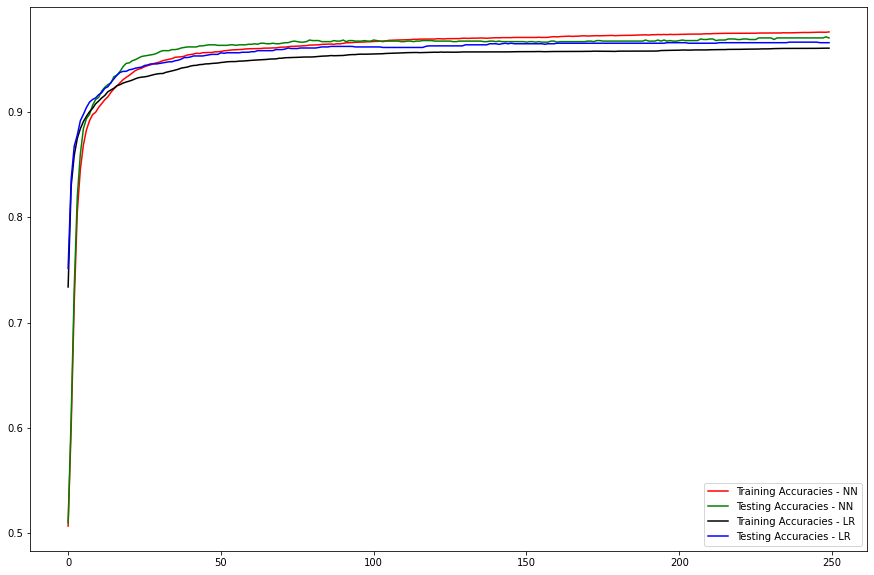

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

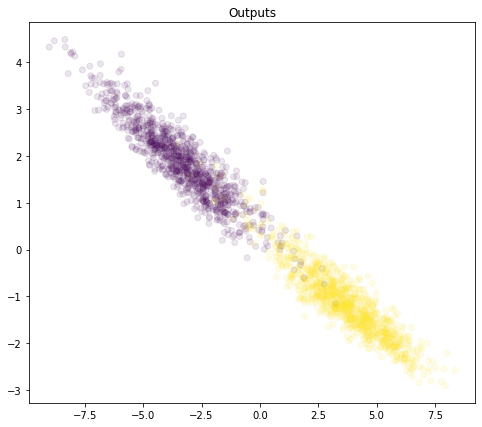

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

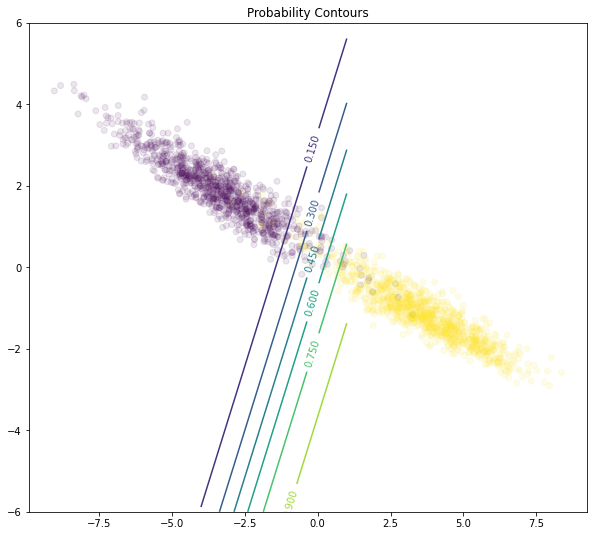

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );